# Lab: Pokémon Data Classification

## Objective
This notebook demonstrates how to classify Pokémon as legendary or not using two machine learning models:
- Logistic Regression
- Multi-Layer Perceptron (MLP)

We will compare the performance of both models using metrics such as accuracy, precision, recall, F1-score, and AUC-ROC.

## Step 1: Load and Explore the Dataset

In [201]:
# Your import 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the Pokémon dataset
pokemon_data =  pd.read_csv('pokemon.csv')# Your code

# Display the first few rows
pokemon_data.head(10)

,name,deck_no,attack,defense,sp_attack,sp_defense,speed,capture_rt,total_bs,type,gen,legendary
0,Bulbasaur,1,49,49,65,65,45,45,318,grass,1,0
1,Ivysaur,2,62,63,80,80,60,45,405,grass,1,0
2,Venusaur,3,100,123,122,120,80,45,625,grass,1,0
3,Charmander,4,52,43,60,50,65,45,309,fire,1,0
4,Charmeleon,5,64,58,80,65,80,45,405,fire,1,0
5,Charizard,6,104,78,159,115,100,45,634,fire,1,0
6,Squirtle,7,48,65,50,64,43,45,314,water,1,0
7,Wartortle,8,63,80,65,80,58,45,405,water,1,0
8,Blastoise,9,103,120,135,115,78,45,630,water,1,0
9,Caterpie,10,30,35,20,20,45,255,195,bug,1,0


## Step 2: Data Preprocessing
### 2.1 Feature Engineering

### <span style="color:red">Please create a derived feature: sp_attack_to_sp_defense_ratio, Target is Legendary</span>. 

In [204]:
# Create a derived feature: sp_attack_to_sp_defense_ratio


# your code
pokemon_data['sp_attack_to_sp_defense_ratio'] = pokemon_data['sp_attack']/pokemon_data['sp_defense']
# Select all features + derived  
features = pokemon_data.columns.drop(['legendary', 'name'])  
features = features.append(pd.Index(['sp_attack_to_sp_defense_ratio']))  

# target: Legendary 
target = 'legendary'
# Your code

X = pokemon_data[features] # Your code
y = pokemon_data[target] # Your code

### 2.2 Data Transformation Using ColumnTransformer

In [207]:
# Your import 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline

# Categorical and numerical columns
# your code
categorical_columns = ['type']
numerical_columns = ['deck_no', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed', 'capture_rt', 'total_bs']

# Preprocessing pipeline
# please choose one suitable method as your scaling method
# please use OneHot as your Encoder
# Your code

preprocessor = ColumnTransformer(transformers = [('cat', OneHotEncoder(), categorical_columns), ('num', StandardScaler(), numerical_columns)])

preprocessor

ColumnTransformer(transformers=[('cat', OneHotEncoder(), ['type']),
                                ('num', StandardScaler(),
                                 ['deck_no', 'attack', 'defense', 'sp_attack',
                                  'sp_defense', 'speed', 'capture_rt',
                                  'total_bs'])])

### Prepare the training data

In [210]:
from sklearn.model_selection import train_test_split

# Transform the data


# Train-test split
# Step 1: First train-test split to create training and temporary sets
# X_transformed: Preprocessed feature data
# y: Target labels
# test_size=0.3: Reserve 30% of the data for validation and test sets
# random_state=42: Ensures reproducibility of the splits
# stratify=y: Maintains the class distribution in the split

#Your code
X_transformed = preprocessor.fit_transform(X)
print(X_transformed.shape)



(801, 26)


In [212]:
# Your import 
from sklearn.model_selection import train_test_split

# Please use train_test_split to prepare your data
# Your code
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.3, random_state=42, stratify=y)

#Print your X_train and X_test
X_train[:2], X_test[:2]

(array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  1.        , -1.39256129, -0.40006789,
         -0.26044725, -0.968214  , -1.10700876, -1.77001294,  1.19130465,
         -0.9517153 ],
        [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          1.        ,  0.        ,  0.        , -0.66600757,  0.19111895,
         -0.09784534, -0.19502508, -0.03220389, -0.52510226, -0.70940526,
         -0.1542614 ]]),
 array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.

## Step 3: Logistic Regression

In [215]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.metrics import accuracy_score

# Please build your Logistic Regression model


logistic_regression_model = LogisticRegression(max_iter = 500, random_state = 42)

# Train Logistic Regression

logistic_regression_model.fit(X_train, y_train)

y_val_pred_logistic = logistic_regression_model.predict(X_test)


# Please use AUC and accuracy score to evaluate your model
# By trying different methods, your accuracy can reach over 90%.


auc_val_logistic = roc_auc_score(y_test, y_val_pred_logistic)

accuracy_score_logistic = accuracy_score(y_test, y_val_pred_logistic)


print("Mohammed Mohideen + Logistic Regression - Validation Performance:")
print(classification_report(y_test, y_val_pred_logistic))
print(f"Validation AUC: {auc_val_logistic:.4f}")
print(f"Validation accuracy: {accuracy_score_logistic:.4f}")

Mohammed Mohideen + Logistic Regression - Validation Performance:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       220
           1       0.88      0.71      0.79        21

    accuracy                           0.97       241
   macro avg       0.93      0.85      0.89       241
weighted avg       0.97      0.97      0.97       241

Validation AUC: 0.8526
Validation accuracy: 0.9668


## Step 4: Multi-Layer Perceptron (MLP)

In [218]:
from sklearn.neural_network import MLPClassifier

# Please build your Multi-Layer Perceptron model

# Hidden layer: 8 weights and 4 biases, activation: relu, iteration : 500
# Your code


# Please use AUC and accuracy score to evalue your model
# By trying different methods, your accuracy can reach over 90%.
# Your code


mlp = MLPClassifier(hidden_layer_sizes = (8,4), activation = 'relu', max_iter= 500, random_state = 42)


# Train MLP Classifier
mlp.fit(X_train, y_train)

# Evaluate MLP Classifier
y_val_pred_mlp = mlp.predict(X_test)

auc_val_mlp = roc_auc_score(y_test, y_val_pred_mlp)
accuracy_score_mlp = accuracy_score(y_test, y_val_pred_mlp)

print("<Your name> + MLP Classifier - Validation Performance:")
print(classification_report(y_test, y_val_pred_mlp))
print(f"Validation AUC: {auc_val_mlp:.4f}")
print(f"Validation accuracy: {accuracy_score_mlp:.4f}")

<Your name> + MLP Classifier - Validation Performance:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       220
           1       0.81      0.62      0.70        21

    accuracy                           0.95       241
   macro avg       0.89      0.80      0.84       241
weighted avg       0.95      0.95      0.95       241

Validation AUC: 0.8027
Validation accuracy: 0.9544


C:\Users\mdars\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


## Step 5: Comparison of Models - Training Loss Curve

### Manually record the loss of logistic regression

In [221]:
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss
# Please record your loss of logistic regression with 500 iterations
# Your code


# Initialize the model with warm_start to fit incrementally
logistic_regression = LogisticRegression(max_iter=1, warm_start=True, random_state=42)


# To store the loss values
loss_curve = []

# Train the model incrementally
# Your code
for i in range(1,501):
    logistic_regression.fit(X_train, y_train)
    y_val_pred_logistic = logistic_regression.predict_proba(X_train)
    loss = log_loss(y_train, y_val_pred_logistic)
    loss_curve.append(loss)


C:\Users\mdars\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\mdars\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

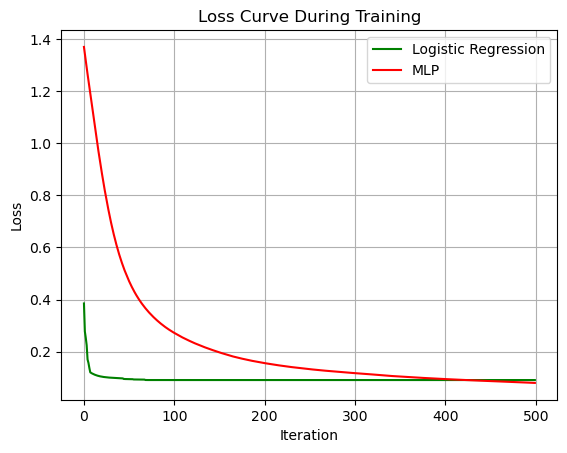

In [222]:
# Extract loss during MLP training
# Your code
mlp_loss = mlp.loss_curve_


# Plot the loss difference during MLP training and Logistic
# please set color of Logistic as green, set MLP as red.
# Your code
plt.plot(loss_curve, label='Logistic Regression', color='green')
plt.plot(mlp_loss, label='MLP', color='red')
plt.title('Loss Curve During Training')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


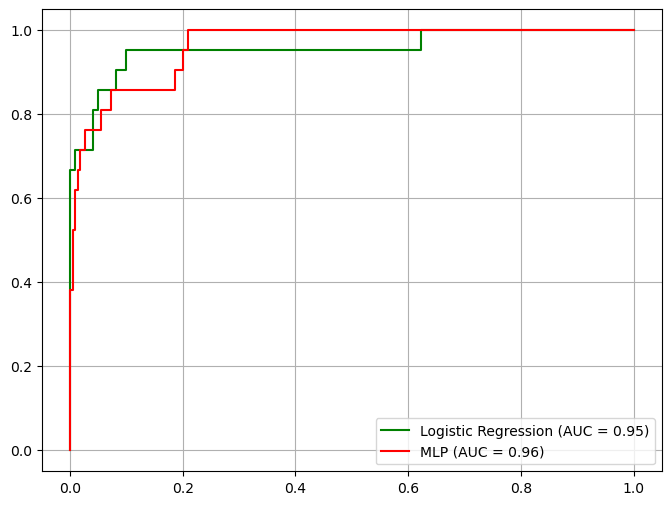

In [224]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
# Plot ROC Curve Comparison
y_prob_log_reg = logistic_regression.predict_proba(X_test)[:, 1]  
y_prob_mlp = mlp.predict_proba(X_test)[:, 1]

# Plot ROC curves
# Your code 
fpr_log_reg, tpr_log_reg, _ = roc_curve(y_test, y_prob_log_reg)
fpr_mlp, tpr_mlp, _ = roc_curve(y_test, y_prob_mlp)
# please set color of Logistic as green, set MLP as red.
# Your code 
auc_log_reg = auc(fpr_log_reg, tpr_log_reg)
auc_mlp = auc(fpr_mlp, tpr_mlp)

plt.figure(figsize=(8, 6))
plt.plot(fpr_log_reg, tpr_log_reg, color='green', label=f'Logistic Regression (AUC = {auc_log_reg:.2f})')
plt.plot(fpr_mlp, tpr_mlp, color='red', label=f'MLP (AUC = {auc_mlp:.2f})')
plt.legend()
plt.grid()

In [225]:
# Your idea:
# both models performed very well in this case, however the MLP model was slightly better AUC score


## Step 6: Visualization of Predictions and Confusion Matrices

### 6.1 Actual vs Predicted Results

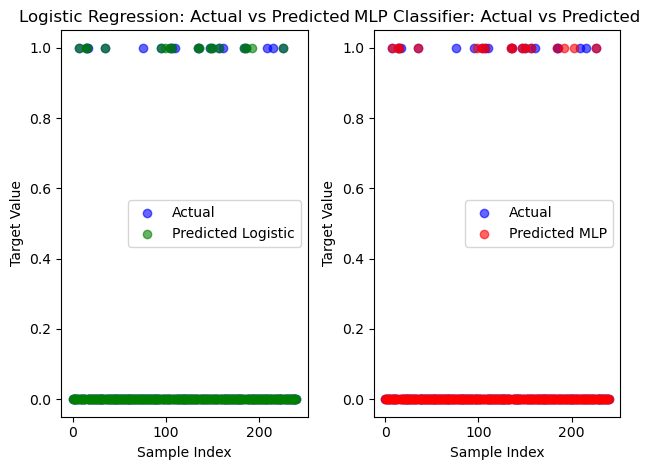

In [228]:
# Please plot the Actual data and Predicted for Logistic and MLP model
# Your code
y_test_pred_logistic = logistic_regression.predict(X_test)

plt.subplot(1, 2, 1)
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual', alpha=0.6)
plt.scatter(range(len(y_test)), y_test_pred_logistic, color='green', label='Predicted Logistic', alpha=0.6)
plt.title('Logistic Regression: Actual vs Predicted')
plt.xlabel('Sample Index')
plt.ylabel('Target Value')
plt.legend()

# Subplot for MLP Classifier
plt.subplot(1, 2, 2)
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual', alpha=0.6)
plt.scatter(range(len(y_test)), y_val_pred_mlp, color='red', label='Predicted MLP', alpha=0.6)
plt.title('MLP Classifier: Actual vs Predicted')
plt.xlabel('Sample Index')
plt.ylabel('Target Value')
plt.legend()

plt.tight_layout()
plt.show()

### Confusion Matrices

Text(145.72222222222223, 0.5, 'True Labels')

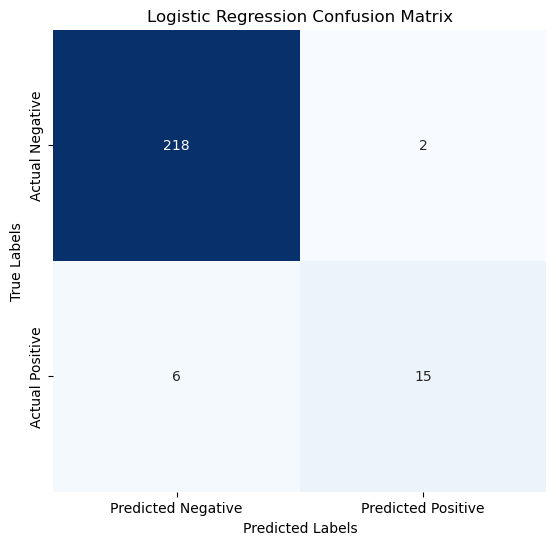

In [230]:
# plot Logistic Regression
from sklearn.metrics import confusion_matrix
import seaborn as sns
# Logistic Regression
conf_matrix_logistic = confusion_matrix(y_test, y_test_pred_logistic)

# your code
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_logistic, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Predicted Negative', 'Predicted Positive'], 
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

Text(321.26767676767673, 0.5, 'True Labels')

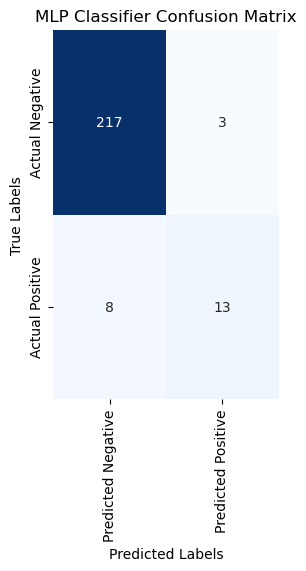

In [231]:
# plot MLP
# Your code
conf_matrix_mlp = confusion_matrix(y_test, y_val_pred_mlp)
plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_mlp, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Predicted Negative', 'Predicted Positive'], 
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('MLP Classifier Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')



## Conclusion

In [240]:
# Please compare the difference and common between Logistic results and MLP results
# Your idea : Looking at the confusion matrices, it looks like the logistic regression did slightly better by having fewer False positives and False negatives
# compared to the MLP. This difference might be amplified with larger data sets.